In [34]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv('../data/final-stroke-data.csv')
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1


In [36]:
df.shape


(5109, 11)

In [37]:
print(df.columns.values)


['gender' 'age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status' 'stroke']


In [38]:
df.describe()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.586025,43.229986,0.097475,0.054022,0.343707,0.838129,0.491877,106.140399,28.894508,1.585829,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.118746,0.499983,45.285004,7.698235,1.092404,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.800000,1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.880000,28.400000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


## Plotting Stroke vs No of Patients


In [39]:
df['stroke'].value_counts()


0    4860
1     249
Name: stroke, dtype: int64

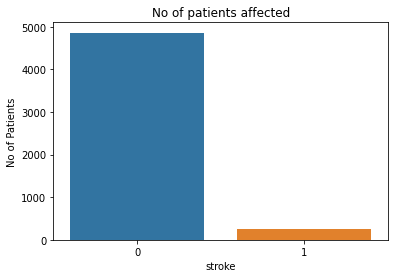

In [40]:
sns.countplot(x=df['stroke'])
plt.title("No of patients affected")
plt.ylabel("No of Patients")
plt.show()

## Finding the relation/dependence of the categorical columns.


In [41]:
print("Gender :", df.gender.unique())
print("Hypertension :", df.hypertension.unique())
print("Heart Disease :", df.heart_disease.unique())
print("Ever Married :", df.ever_married.unique())
print("Work Type :", df.work_type.unique())
print("Residence Type :", df.Residence_type.unique())
print("Smoking Status :", df.smoking_status.unique())

Gender : [0 1]
Hypertension : [0 1]
Heart Disease : [1 0]
Ever Married : [0 1]
Work Type : [0 1 2 3 4]
Residence Type : [0 1]
Smoking Status : [0 1 2 3]


**Stroke vs Hypertension**


hypertension  stroke
0             0         4428
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64


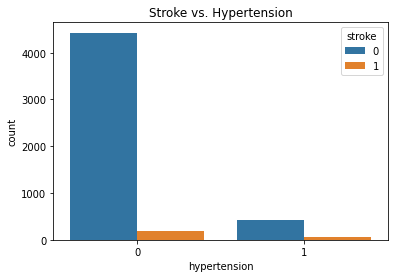

HT- Probability : 4.13 %
HT+ Probability : 15.28 %


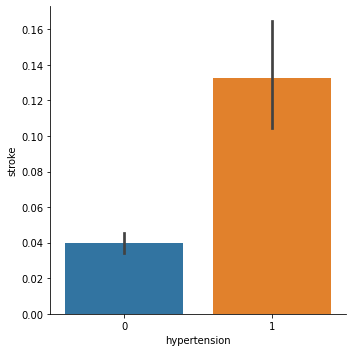

In [42]:
ht_group = df.groupby(df.hypertension)['stroke'].value_counts()
print(ht_group)

sns.countplot(x=df['hypertension'], hue=df['stroke'])
plt.title("Stroke vs. Hypertension")
plt.show()

print(f"HT- Probability : {(ht_group[0][1] / ht_group[0][0])*100:.2f} %")
print(f"HT+ Probability : {(ht_group[1][1] / ht_group[1][0])*100:.2f} %")

sns.catplot(x="hypertension", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** People diagnosed with hypertension have high chances of Stroke.


**Stroke vs Heart Disease**


heart_disease  stroke
0              0         4631
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64


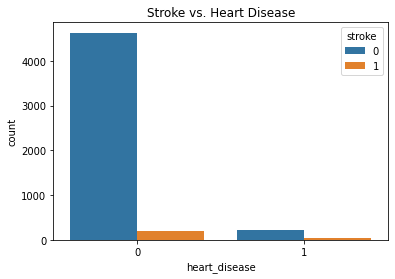

Heart Disease- Probability : 4.36 %
Heart Disease+ Probability : 20.52 %


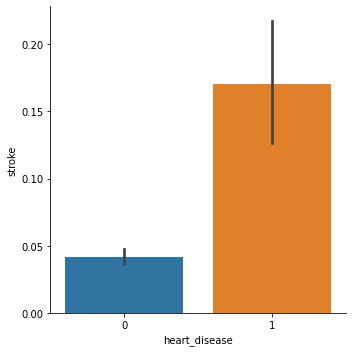

In [43]:
hd_group = df.groupby(df.heart_disease)['stroke'].value_counts()
print(hd_group)

sns.countplot(x=df.heart_disease, hue=df['stroke'])
plt.title("Stroke vs. Heart Disease")
plt.show()

print(f"Heart Disease- Probability : {(hd_group[0][1] / hd_group[0][0])*100:.2f} %")
print(f"Heart Disease+ Probability : {(hd_group[1][1] / hd_group[1][0])*100:.2f} %")

sns.catplot(x="heart_disease", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** People who had heart disease have higher chances of stroke.


## Finding the relation/dependence of the numerical columns.


**AGE**


In [44]:
df.groupby(['stroke'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,41.974831,22.293056,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


<AxesSubplot:xlabel='stroke', ylabel='age'>

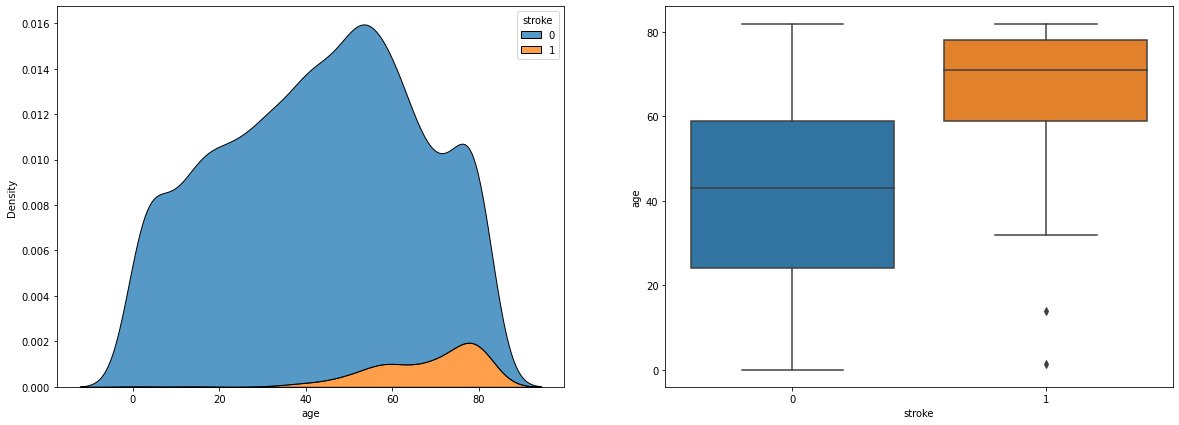

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot(data=df, x="age", hue="stroke", multiple="stack", ax=ax[0])
sns.boxplot(data=df, x="stroke", y="age", ax=ax[1])

**_Inference :_** People around the age range 60 to 80 has higher chances of stroke


**Average Glucose Level**


In [46]:
df.groupby(['stroke'])['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,104.787584,43.847095,55.12,77.12,91.465,112.80,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.220,196.71,271.74


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

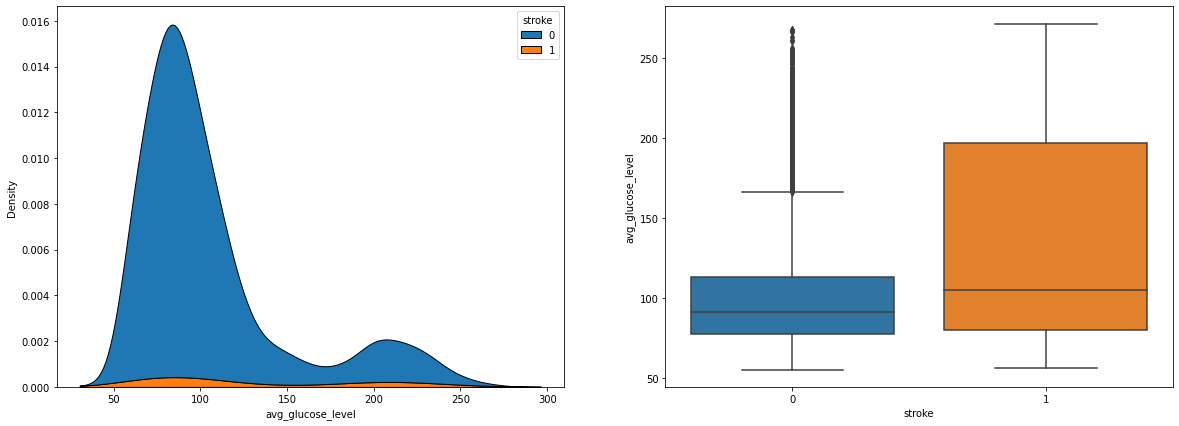

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke",
            multiple="stack", ax=ax[0], alpha=1)
sns.boxplot(data=df, x="stroke", y="avg_glucose_level", ax=ax[1])

**_Inference :_** People with higher _Average Glucose Level_ have higher chances of stroke.


**BMI**


In [48]:
df.groupby(['stroke'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,28.826710,7.776457,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

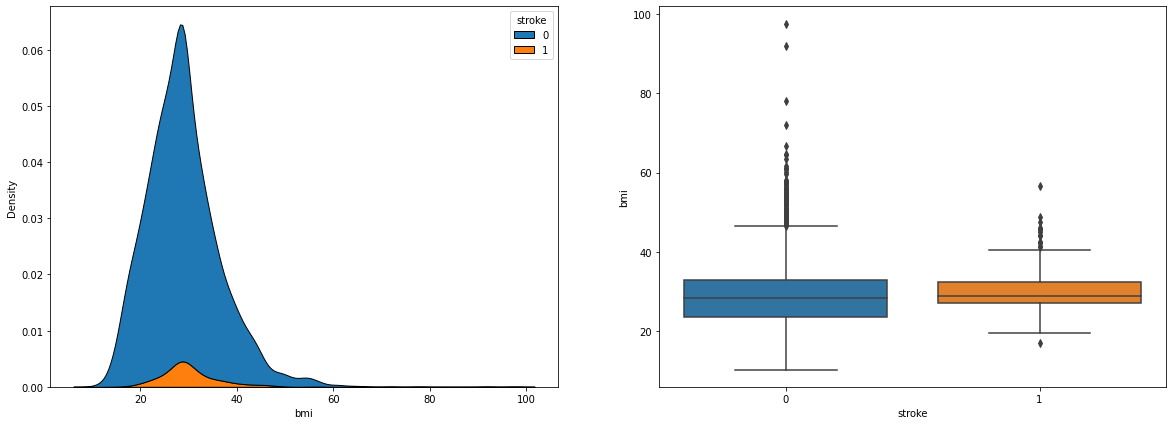

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot(data=df, x="bmi", hue="stroke",
            multiple="stack", ax=ax[0], alpha=1)
sns.boxplot(data=df, x="stroke", y="bmi", ax=ax[1])

**Inference :** BMI index doesnt give any relation with stroke.
